In [2]:
import sympy as sp
import numpy as np
import scipy as sc
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import special
from scipy.integrate import quad
from scipy.fftpack import fft, fftfreq, fftshift



from IPython.display import display
sp.init_printing()
%matplotlib notebook

In [3]:
x,y,k,n = sp.symbols('x y k n')

h = 6.62*10**(-34)
m = 9.11*10**(-31)

L1 = 0
L2 = 5
L = abs(L2-L1)


def E(i):
    return i**2* np.pi**2*h**2/(2*m*L**2)

f = sp.Function('f')

f = sp.sqrt(2/L) *sp.sin(k*sp.pi*x/L)

f_n = sp.lambdify([x,k], f, 'numpy')



In [4]:
# initial condition

<IPython.core.display.Javascript object>


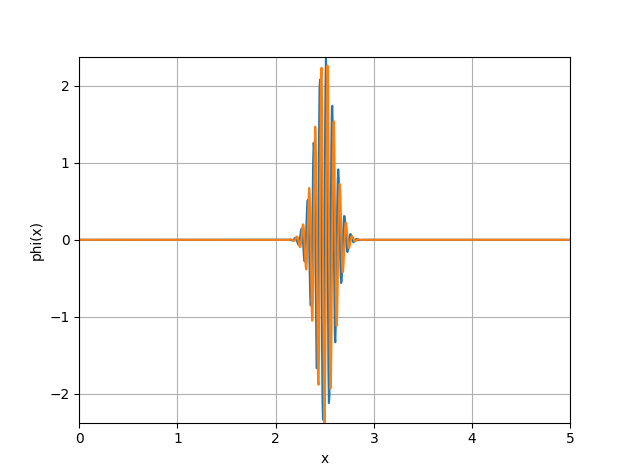

In [5]:
sigma = 0.1
x0 = L/2
k0 = 100

phi_niet_genormeerd = sp.exp(-(x-x0)**2/(2*sigma**2))*sp.exp(x*k0*complex(0,1))

phi_niet_genormeerd_n = sp.lambdify(x, phi_niet_genormeerd, 'numpy')


g = lambda x: abs(phi_niet_genormeerd_n(x))**2


def complex_quadrature(func, a, b, **kwargs):
    def real_func(x):
        return sc.real(func(x))
    def imag_func(x):
        return sc.imag(func(x))
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0])



# call quad to integrate f from -2 to 2
integraal = complex_quadrature(g, L1, L2)

A = np.sqrt(1/integraal.real)



phi = A * phi_niet_genormeerd

phi_n = sp.lambdify(x,phi, 'numpy')


xx = np.linspace(0,L, 1000)

fig, ax = plt.subplots(1,1)

ax.plot(xx,phi_n(xx).real)
ax.plot(xx,phi_n(xx).imag)

ax.set_xlim([0, L])
ax.set_ylim([-A,A])

plt.grid(True)

plt.xlabel('x')
plt.ylabel('phi(x)')

plt.show()

In [6]:
'''
fig, ax = plt.subplots(1,1)

# number of signal points
N = 400
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = phi_n(x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()
'''

'\nfig, ax = plt.subplots(1,1)\n\n# number of signal points\nN = 400\nT = 1.0 / 800.0\nx = np.linspace(0.0, N*T, N)\ny = phi_n(x)\nyf = fft(y)\nxf = fftfreq(N, T)\nxf = fftshift(xf)\nyplot = fftshift(yf)\nplt.plot(xf, 1.0/N * np.abs(yplot))\nplt.grid()\nplt.show()\n'

In [7]:
# psi op tijdstip t = 0

In [8]:
def integrate(m):  # m is het kwantumgetal
    # function we want to integrate
    h = lambda x: phi_n(x)*f_n(x,m)
    
    # call quad to integrate f from -2 to 2
    res = complex_quadrature(h, L1, L2)
    
    return res

<IPython.core.display.Javascript object>


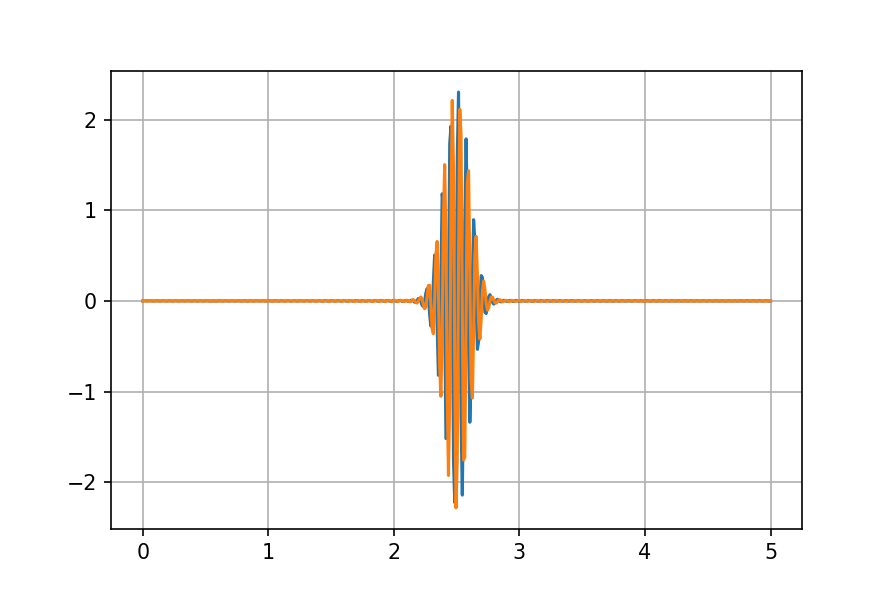

In [9]:
x_vals = np.linspace(L1, L2, 500)
g_r = np.linspace(0,0,500)
g_i = np.linspace(0,0,500)



aantal_kwantum_getal = 200

coeff = []
coeff_r = []
coeff_i = []

for i in range(1, aantal_kwantum_getal+1):
    coeff.append(integrate(i))
    coeff_r.append(integrate(i).real)
    coeff_i.append(integrate(i).imag)
    g_r = g_r + coeff_r[i-1]*f_n(x_vals,i)
    g_i = g_i + coeff_i[i-1]*f_n(x_vals,i)



fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(6, 4))

plt.plot(x_vals, g_r)
plt.plot(x_vals, g_i)
plt.grid(True)
plt.show()


In [10]:
# psi_reel Voor tijden =\ 0

In [11]:
def psi_reel(t,X,aantal):
    psi_reel = np.linspace(0,0,500)
    aantal_kwantum_getal = aantal
    
    for i in range(1, aantal_kwantum_getal+1):
        psi_reel = psi_reel + coeff[i-1]*f_n(X,i)*np.cos(-E(i)*t/h)
        
    return psi_reel

def psi_im(t,X,aantal):
    psi_im = np.linspace(0,0,500)
    aantal_kwantum_getal = aantal
    
    for i in range(1, aantal_kwantum_getal+1):
        psi_im = psi_im + coeff[i-1]*f_n(X,i)*np.sin(-E(i)*t/h)
        
    return psi_im

def psi(t,X,aantal):
    psi = np.linspace(0,0,500)
    aantal_kwantum_getal = aantal
    
    for i in range(1, aantal_kwantum_getal+1):
        psi = psi + coeff[i-1]*f_n(X,i)*np.exp(-E(i)*t/h * complex(0,1))
        
    return psi
    

<IPython.core.display.Javascript object>


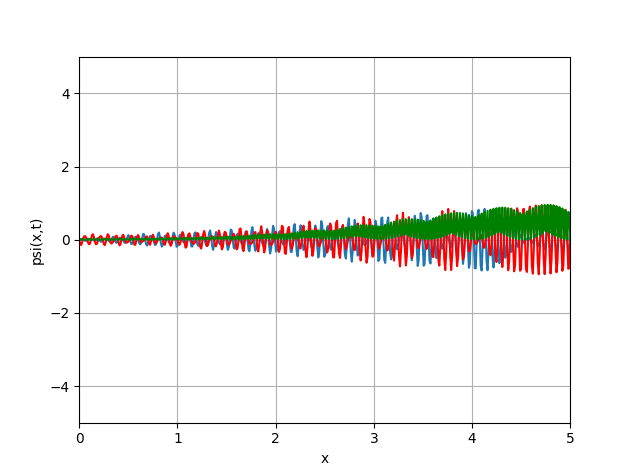

In [15]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0, L])

hoogte = 5
ax.set_ylim([-hoogte, hoogte])

# Vul hieronder de code aan.
# T = np.linspace(0, 0, 500) gebruik dit voor T als je toch t = 0 wil
tijd_regenerate = 2*np.pi*h/E(1)

T = np.linspace(0,tijd_regenerate,int(tijd_regenerate)*2)
#T = np.linspace(0,1,500)
aantal_kwantum_getal = 200
X = x_vals
functie, = ax.plot([], [])
functie2, = ax.plot([], [], color='red')
functie3, = ax.plot([], [], color='green')

def animate(i):
    #Y1 = psi_reel(T[i],X, aantal_kwantum_getal) # blauw
    #Z1 = psi_im(T[i], X, aantal_kwantum_getal)  # rood
    #P1 = Y1**2+Z1**2  # kansdichtheid
    
    Y = psi(T[i],X,aantal_kwantum_getal).real
    Z = psi(T[i],X,aantal_kwantum_getal).imag
    P = abs(psi(T[i],X,aantal_kwantum_getal))**2
    
    functie.set_data(X,Y)
    functie2.set_data(X,Z)
    functie3.set_data(X,P)

plt.grid(True)

plt.xlabel('x')
plt.ylabel('psi(x,t)')

anim = animation.FuncAnimation(fig, animate, frames=len(T), interval=50)

plt.show()

In [12]:
# Klassiek deeltje

In [13]:
'Zie ook https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1806-11172012000200019&lng=en&nrm=iso&tlng=en . Om de link te gebruiken: niet rechtstreeks op klikken, maar rechtstreeks in google plakken!'

'Zie ook https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1806-11172012000200019&lng=en&nrm=iso&tlng=en . Om de link te gebruiken: niet rechtstreeks op klikken, maar rechtstreeks in google plakken!'

In [32]:
x0 = x0
v0 = 0.20
Periode = 2*L/v0

t_switch1 = (L-x0)/v0
display(t_switch1)

In [33]:
def f(t,n):  # dit is de f functie in de link
    return v0*Periode/2-x0-v0*abs(t-n*Periode-Periode/2)

def theta(t,n):  # dit is de theta functie in de link
    return np.heaviside(t-n*Periode,0) - np.heaviside(t-(n+1)*Periode,0)

<IPython.core.display.Javascript object>


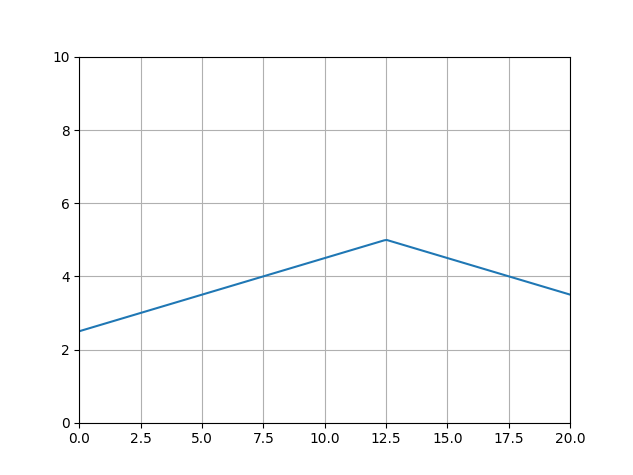

In [34]:
T1 = np.linspace(0,t_switch1)
T2 = np.linspace(t_switch1,t_switch1 + 50,500)

n = 10

afstand = np.linspace(x0,x0,500)

afstand0 = x0+v0*T1

for i in range(n+1):
    afstand = afstand + f(T2,i)*theta(T2,i)
    
fig, ax = plt.subplots(1,1)
ax.set_xlim([0, 20])
ax.set_ylim([0, 10])

plt.plot(T2-t_switch1, afstand)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


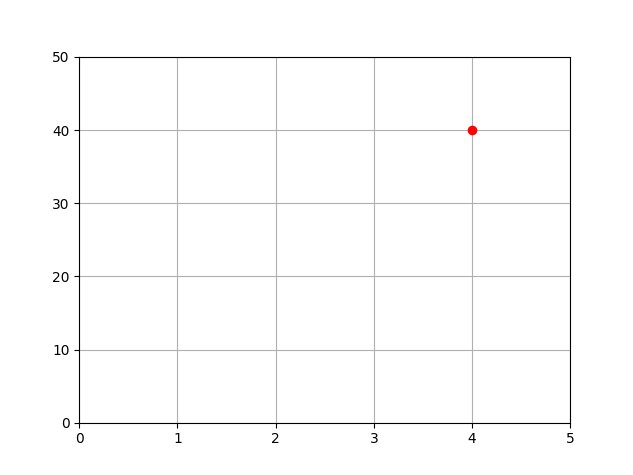

In [35]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0, L])
ax.set_ylim([0, 50])


YY = np.linspace(40,40,500)
XX = afstand

dot, = ax.plot([], [], 'o', color='red')


def animate(i):
    dot.set_data(XX[i], YY[i])


plt.grid(True)


anim = animation.FuncAnimation(fig, animate, frames=len(T), interval=50)
plt.show()

<IPython.core.display.Javascript object>


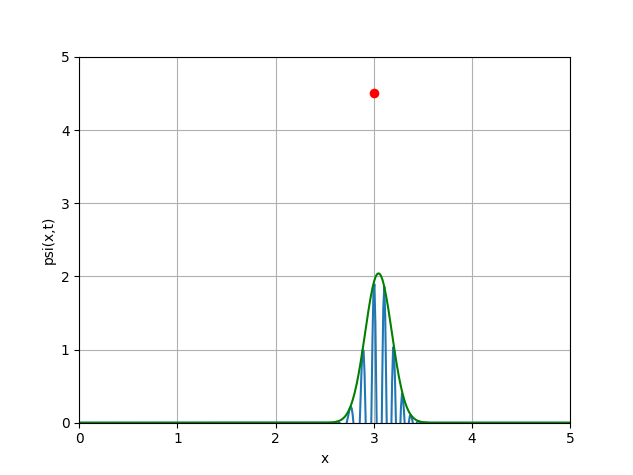

In [36]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0, L])


ax.set_ylim([0, hoogte])

# Vul hieronder de code aan.
# T = np.linspace(0, 0, 500) gebruik dit voor T als je toch t = 0 wil
T = np.linspace(0,Periode*2,int(Periode)*4)
X = x_vals
functie, = ax.plot([], [])
functie2, = ax.plot([], [], color='red')
functie3, = ax.plot([], [], color='green')

YY = np.linspace(9/10*hoogte,9/10*hoogte,500)
XX = afstand

dot, = ax.plot([], [], 'o', color='red')

def animate(i):
    Y = psi(T[i],X,aantal_kwantum_getal).real # blauw
    Z = psi(T[i],X,aantal_kwantum_getal).imag # rood
    P = abs(psi(T[i],X,aantal_kwantum_getal))**2 # groen
    functie.set_data(X, Y)
    #functie2.set_data(X,Z)
    functie3.set_data(X,P)
    dot.set_data(XX[i], YY[i])
    

plt.grid(True)

plt.xlabel('x')
plt.ylabel('psi(x,t)')

anim = animation.FuncAnimation(fig, animate, frames=len(T), interval=50)
plt.show()